In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model


In [ ]:
# Load Fashion MNIST (grayscale clothing images)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Add a channel dimension (grayscale = 1 channel)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Check shape
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


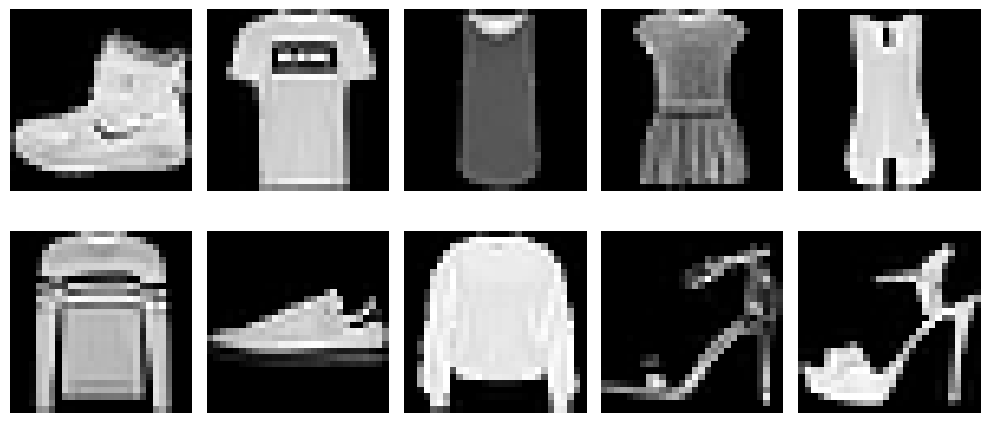

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
k = 0
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(x_train[k].reshape(28, 28), cmap='gray')
        ax[i][j].axis('off')
        k += 1
plt.tight_layout()
plt.show()


In [ ]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
input_layer = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(10, activation='softmax')(x)

model = Model(input_layer, output)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 119s 62ms/step - accuracy: 0.7531 - loss: 0.6708 - val_accuracy: 0.8824 - val_loss: 0.3197
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 59ms/step - accuracy: 0.8863 - loss: 0.3103 - val_accuracy: 0.9001 - val_loss: 0.2813
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 114s 61ms/step - accuracy: 0.9085 - loss: 0.2557 - val_accuracy: 0.9073 - val_loss: 0.2609
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 60ms/step - accuracy: 0.9158 - loss: 0.2272 - val_accuracy: 0.9146 - val_loss: 0.2372
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 111s 59ms/step - accuracy: 0.9272 - loss: 0.1966 - val_accuracy: 0.9136 - val_loss: 0.2526
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 59ms/step - accuracy: 0.9354 - loss: 0.1764 - val_accuracy: 0.9154 - val_loss: 0.2382
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 59ms/step - accuracy: 0.9414 - loss: 0.1565 - val_accuracy: 0.9232 - val_loss: 0.2375
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 58ms/step - accuracy: 

In [ ]:
# Define data augmentation
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Create generator
train_gen = data_gen.flow(x_train, y_train, batch_size=32)

# Set reduced steps per epoch
steps = 500

# Continue training
history_aug = model.fit(
    train_gen,
    steps_per_epoch=steps,
    validation_data=(x_test, y_test),
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/step - accuracy: 0.7947 - loss: 0.6080 - val_accuracy: 0.9082 - val_loss: 0.2666
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.8583 - loss: 0.3885 - val_accuracy: 0.9050 - val_loss: 0.2636
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.8680 - loss: 0.3590 - val_accuracy: 0.9084 - val_loss: 0.2571
Epoch 4/10
375/500 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.8684 - loss: 0.3585

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.8695 - loss: 0.3543 - val_accuracy: 0.9086 - val_loss: 0.2540
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 87s 76ms/step - accuracy: 0.8740 - loss: 0.3406 - val_accuracy: 0.9097 - val_loss: 0.2497
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 74ms/step - accuracy: 0.8761 - loss: 0.3296 - val_accuracy: 0.9116 - val_loss: 0.2567
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.8851 - loss: 0.3162 - val_accuracy: 0.9145 - val_loss: 0.2391
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.8915 - loss: 0.3010 - val_accuracy: 0.9081 - val_loss: 0.2628
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 74ms/step - accuracy: 0.8836 - loss: 0.3062 - val_accuracy: 0.9138 - val_loss: 0.2445
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.8948 - loss: 0.2863 - val_accuracy: 0.9155 - val_loss: 0.2300


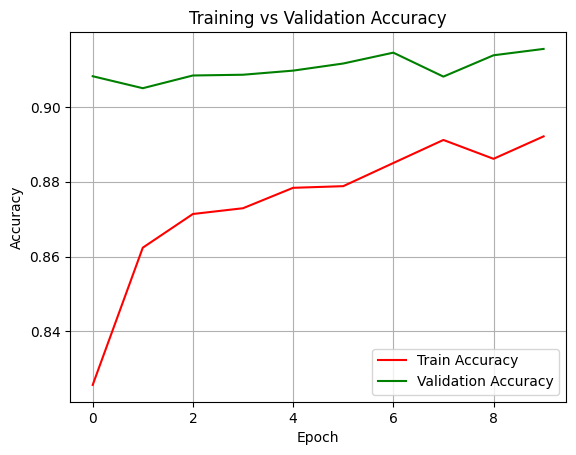

In [ ]:
plt.plot(history_aug.history['accuracy'], label='Train Accuracy', color='red')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


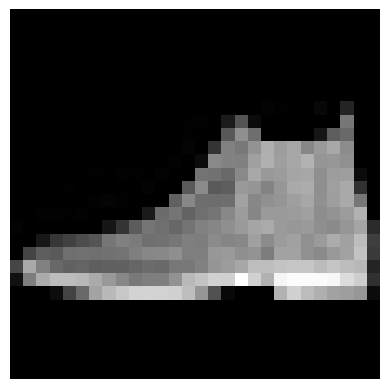

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Original: Ankle boot, Predicted: Ankle boot


In [ ]:
image_index = 0
plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

img = np.expand_dims(x_test[image_index], 0)
pred = model.predict(img)
predicted_class = labels[np.argmax(pred)]
true_class = labels[y_test[image_index]]
print(f"Original: {true_class}, Predicted: {predicted_class}")


In [ ]:
model.save("fashion_mnist_model.h5")
